# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime


from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
weather_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in  enumerate(cities):

    city_url = base_url + "q=" + city + "&appid=" + weather_api_key
    response = requests.get(city_url)
    city_data = response.json()

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city in cities list
    try:
        city_weather = {"City": city,
            "Latitude": city_data["coord"]["lat"],
            "Longitude": city_data["coord"]["lon"],
            "Max Temp": city_data["main"]["temp_max"],
            "Humidity": city_data["main"]["humidity"],
            "Cloudiness": city_data["clouds"]["all"],
            "Wind Speed": city_data["wind"]["speed"],
            "Country": city_data["sys"]["country"],
            "Date": city_data["dt"]}
            
        weather_data.append(city_weather)
    except:
        print("City not found. Skipping...")
    pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | masuguru
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | manaure
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | olyokminsk
Processing Record 15 of Set 1 | arias
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | greymouth
Processing Record 18 of Set 1 | sur
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | ketchikan
Processing Record 21 of Set 1 | pangai
Processing Record 22 of Set 1 | island harbour
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_data)

# Show Record Count
city_data_df.count()

City          577
Latitude      577
Longitude     577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,297.45,97,100,3.23,IN,1723059239
1,masuguru,-11.3667,38.4167,295.65,51,4,2.51,TZ,1723059240
2,olonkinbyen,70.9221,-8.7187,279.32,100,100,4.14,SJ,1723059242
3,tolanaro,-25.0319,46.9987,295.19,73,75,7.20,MG,1723059243
4,hilo,19.7297,-155.0900,300.42,79,0,2.57,US,1723059138


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,297.45,97,100,3.23,IN,1723059239
1,masuguru,-11.3667,38.4167,295.65,51,4,2.51,TZ,1723059240
2,olonkinbyen,70.9221,-8.7187,279.32,100,100,4.14,SJ,1723059242
3,tolanaro,-25.0319,46.9987,295.19,73,75,7.20,MG,1723059243
4,hilo,19.7297,-155.0900,300.42,79,0,2.57,US,1723059138


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

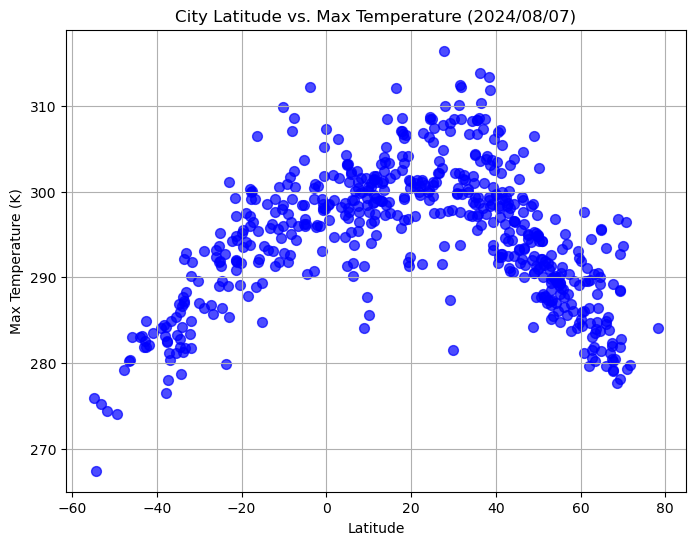

<Figure size 640x480 with 0 Axes>

In [20]:
# Build scatter plot for latitude vs. temperature
today_date = time.strftime('%Y/%m/%d')

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Max Temperature ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')

# Show grid
plt.grid(True)
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")



#### Latitude Vs. Humidity

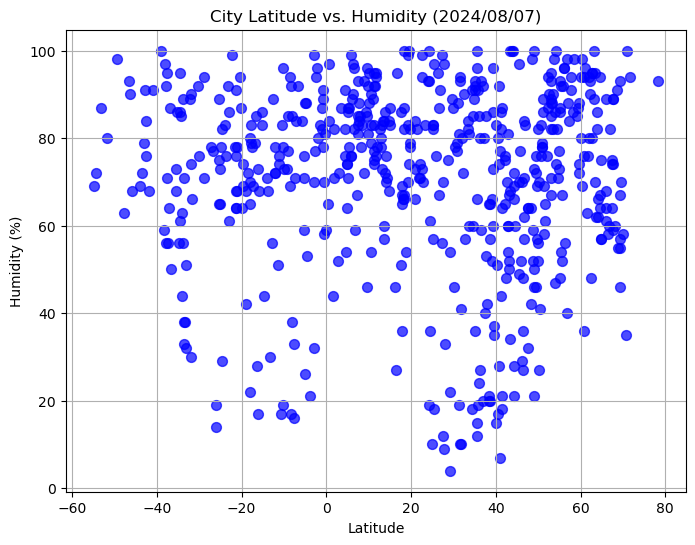

<Figure size 640x480 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. humidity
# Create scatter plot


plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Humidity ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show grid
plt.grid(True)
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

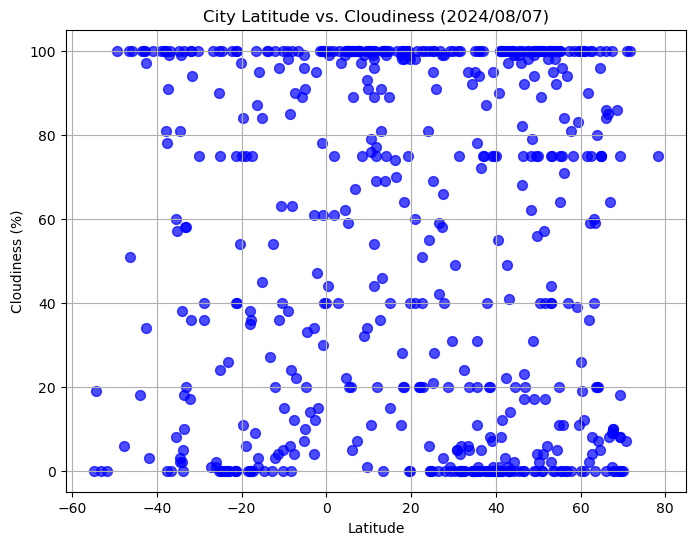

<Figure size 640x480 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Cloudiness ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Show grid
plt.grid(True)
# Show plot
plt.show()
# Save plot
plt.savefig("output_data/Fig3.png")



#### Latitude vs. Wind Speed Plot

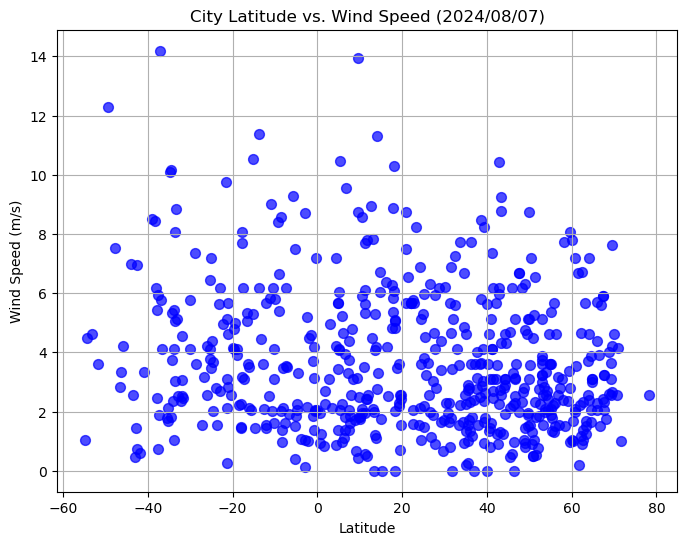

<Figure size 640x480 with 0 Axes>

In [21]:
# Build the scatter plots for latitude vs. wind speed
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], color='blue', s=50, alpha=0.7)

# Add titles and labels
plt.title(f'City Latitude vs. Wind Speed ({today_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Show grid
plt.grid(True)
# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,297.45,97,100,3.23,IN,1723059239
2,olonkinbyen,70.9221,-8.7187,279.32,100,100,4.14,SJ,1723059242
4,hilo,19.7297,-155.0900,300.42,79,0,2.57,US,1723059138
6,manaure,11.7751,-72.4445,301.79,76,77,7.80,CO,1723059247
10,ilulissat,69.2167,-51.1000,278.16,93,75,2.57,GL,1723059254


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,masuguru,-11.3667,38.4167,295.65,51,4,2.51,TZ,1723059240
3,tolanaro,-25.0319,46.9987,295.19,73,75,7.20,MG,1723059243
5,port-aux-francais,-49.3500,70.2167,274.14,98,100,12.28,TF,1723059246
7,punta arenas,-53.1500,-70.9167,275.21,87,0,4.63,CL,1723059249
8,waitangi,-43.9535,-176.5597,283.05,69,18,6.97,NZ,1723059250


###  Temperature vs. Latitude Linear Regression Plot

In [38]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col):
    # Extract the data
    X = df[x_col].values
    y = df[y_col].values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

    # Predict values
    y_pred = slope * X + intercept

    # Get today's date
    today_date = time.strftime('%Y/%m/%d')

    # Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=50, alpha=0.7, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

    # Add titles and labels
plt.title(f'{x_col} vs. {y_col} with Linear Regression ({today_date})')
plt.xlabel(x_col)
plt.ylabel(y_col)

    # Display R² value on the plot
plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Show grid and legend
plt.grid(True)
plt.legend()

    # Show plot
plt.show()

NameError: name 'X' is not defined

<Figure size 1000x600 with 0 Axes>

The r^2-value is: 0.6720220238897325


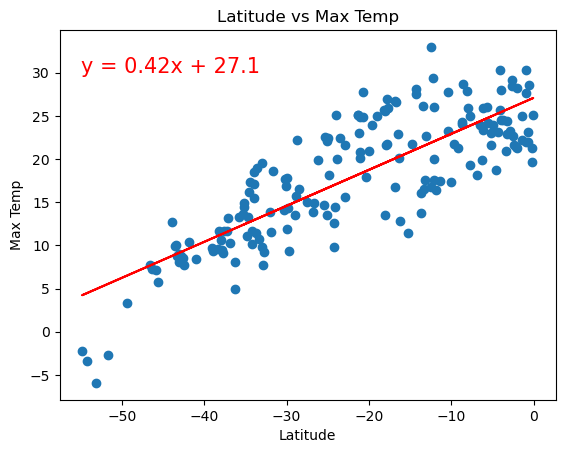

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


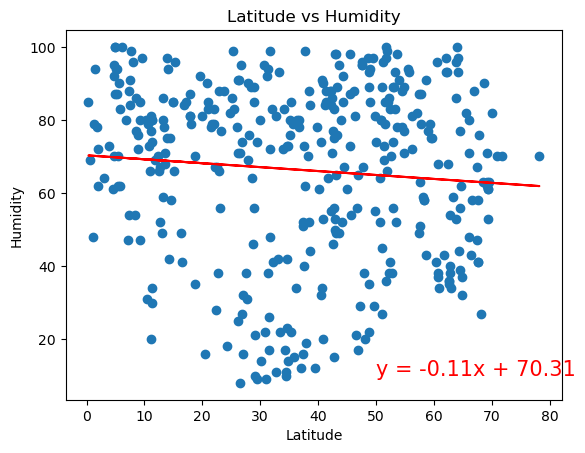

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


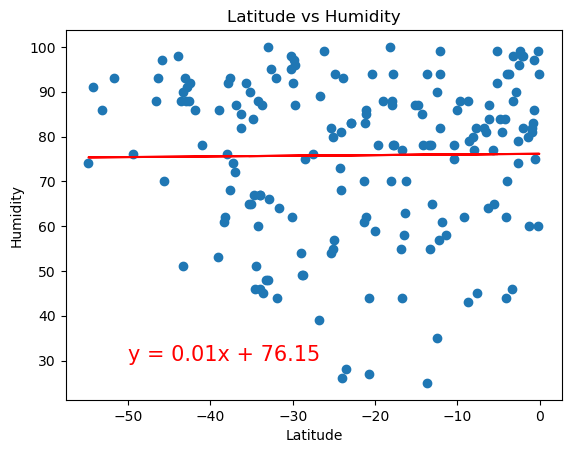

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


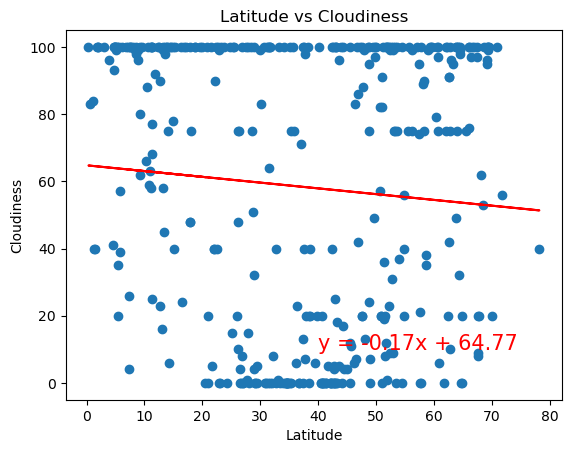

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


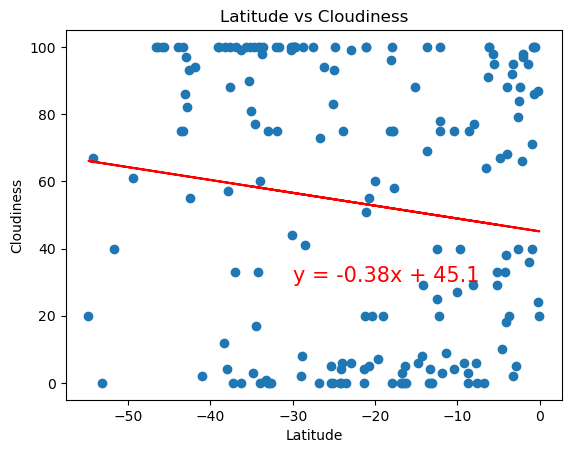

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


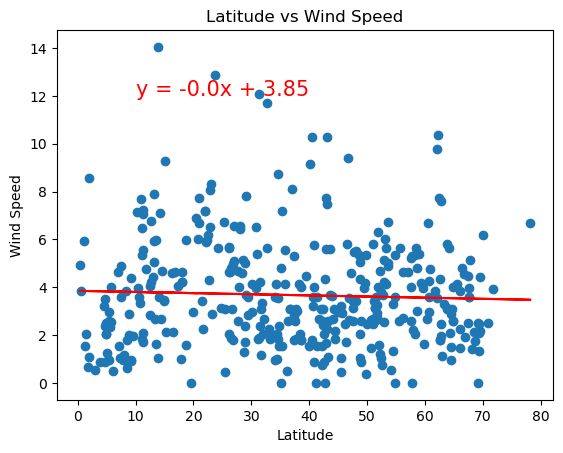

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


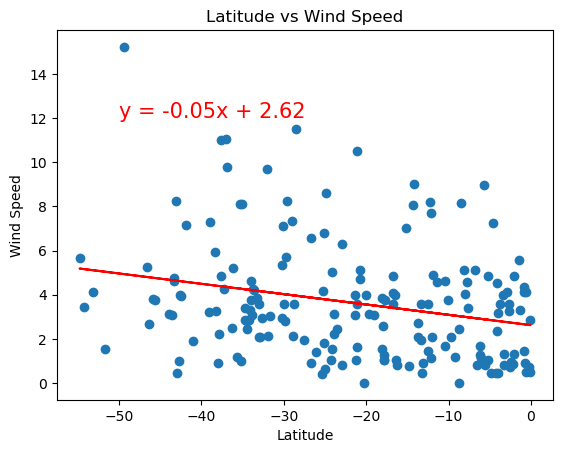

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE